# Example sandbox

### old stuff

In [1]:
# Importing
import theano.tensor as T
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

#%matplotlib inline
%matplotlib notebook

## Visualize data

# Setting the extent
geo_data = GeMpy.import_data([0,10,0,10,0,10])


# =========================
# DATA GENERATION IN PYTHON
# =========================
# Layers coordinates
layer_1 = np.array([[0.5,4,7], [2,4,6.5], [4,4,7], [5,4,6]])#-np.array([5,5,4]))/8+0.5
layer_2 = np.array([[3,4,5], [6,4,4],[8,4,4], [7,4,3], [1,4,6]])
layers = np.asarray([layer_1,layer_2])

# Foliations coordinates
dip_pos_1 = np.array([7,4,7])#- np.array([5,5,4]))/8+0.5
dip_pos_2 = np.array([2.,4,4])

# Dips
dip_angle_1 = float(15)
dip_angle_2 = float(340)
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float64")

# Azimuths
azimuths = np.asarray([90,90], dtype="float64")

# Polarity
polarity = np.asarray([1,1], dtype="float64")

# Setting foliations and interfaces values
GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :np.append(layer_1[:, 0],layer_2[:,0]),
            "Y" :np.append(layer_1[:, 1],layer_2[:,1]),
            "Z" :np.append(layer_1[:, 2],layer_2[:,2]),
            "formation" : np.append(
               np.tile("Layer 1", len(layer_1)), 
               np.tile("Layer 2", len(layer_2))),
            "labels" : [r'${\bf{x}}_{\alpha \, 0}^1$',
               r'${\bf{x}}_{\alpha \, 1}^1$',
               r'${\bf{x}}_{\alpha \, 2}^1$',
               r'${\bf{x}}_{\alpha \, 3}^1$',
               r'${\bf{x}}_{\alpha \, 0}^2$',
               r'${\bf{x}}_{\alpha \, 1}^2$',
               r'${\bf{x}}_{\alpha \, 2}^2$',
               r'${\bf{x}}_{\alpha \, 3}^2$',
               r'${\bf{x}}_{\alpha \, 4}^2$'] }))

GeMpy.set_foliations(geo_data,  pn.DataFrame(
    data = {"X" :np.append(dip_pos_1[0],dip_pos_2[0]),
            "Y" :np.append(dip_pos_1[ 1],dip_pos_2[1]),
            "Z" :np.append(dip_pos_1[ 2],dip_pos_2[2]),
            "azimuth" : azimuths,
            "dip" : dips_angles,
            "polarity" : polarity,
            "formation" : ["Layer 1", "Layer 2"],
            "labels" : [r'${\bf{x}}_{\beta \,{0}}$',
              r'${\bf{x}}_{\beta \,{1}}$'] })) 



layer_3 = np.array([[2,4,3], [8,4,2], [9,4,3]])
dip_pos_3 = np.array([1,4,1])
dip_angle_3 = float(80)
azimuth_3 = 90
polarity_3 = 1



GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :layer_3[:, 0],
            "Y" :layer_3[:, 1],
            "Z" :layer_3[:, 2],
            "formation" : np.tile("Layer 3", len(layer_3)), 
            "labels" : [  r'${\bf{x}}_{\alpha \, 0}^3$',
                           r'${\bf{x}}_{\alpha \, 1}^3$',
                           r'${\bf{x}}_{\alpha \, 2}^3$'] }), append = True)
GeMpy.get_raw_data(geo_data,"interfaces")

 
GeMpy.set_foliations(geo_data, pn.DataFrame(data = {
                     "X" : dip_pos_3[0],
                     "Y" : dip_pos_3[1],
                     "Z" : dip_pos_3[2],
                     "azimuth" : azimuth_3,
                     "dip" : dip_angle_3,
                     "polarity" : polarity_3,
                     "formation" : [ 'Layer 3'],
                     "labels" : r'${\bf{x}}_{\beta \,{2}}$'}), append = True)


GeMpy.set_data_series(geo_data, {'older': 'Layer 3', 'younger': ('Layer 1', 'Layer 2'),
                      }, order_series = ['younger', 'older'])

#GeMpy.plot_data(geo_data)

data_interp = GeMpy.set_interpolator(geo_data, u_grade = 0, compute_potential_field= False, compute_block_model = False,
                      verbose = 0)


In [2]:
data_interp.interpolator._data_prep()
data_interp.interpolator._data_scaled.interfaces

,X,Y,Z,formation,formation number,labels,order_series,series
0,0.2501,0.5001,0.676571,Layer 1,0,"${\bf{x}}_{\alpha \, 0}^1$",0,younger
1,0.338335,0.5001,0.647159,Layer 1,0,"${\bf{x}}_{\alpha \, 1}^1$",0,younger
2,0.455982,0.5001,0.676571,Layer 1,0,"${\bf{x}}_{\alpha \, 2}^1$",0,younger
3,0.514806,0.5001,0.617747,Layer 1,0,"${\bf{x}}_{\alpha \, 3}^1$",0,younger
4,0.397159,0.5001,0.558924,Layer 2,1,"${\bf{x}}_{\alpha \, 0}^2$",0,younger
5,0.573629,0.5001,0.5001,Layer 2,1,"${\bf{x}}_{\alpha \, 1}^2$",0,younger
6,0.691276,0.5001,0.5001,Layer 2,1,"${\bf{x}}_{\alpha \, 2}^2$",0,younger
7,0.632453,0.5001,0.441276,Layer 2,1,"${\bf{x}}_{\alpha \, 3}^2$",0,younger
8,0.279512,0.5001,0.617747,Layer 2,1,"${\bf{x}}_{\alpha \, 4}^2$",0,younger
0,0.338335,0.5001,0.441276,Layer 3,2,"${\bf{x}}_{\alpha \, 0}^3$",1,older


In [6]:
a = data_interp.interpolator.len_interfaces
b = data_interp.interpolator._data_scaled.interfaces

In [26]:
b.iloc[c]

,X,Y,Z,formation,formation number,labels,order_series,series
0,0.2501,0.5001,0.676571,Layer 1,0,"${\bf{x}}_{\alpha \, 0}^1$",0,younger
4,0.397159,0.5001,0.558924,Layer 2,1,"${\bf{x}}_{\alpha \, 0}^2$",0,younger
0,0.338335,0.5001,0.441276,Layer 3,2,"${\bf{x}}_{\alpha \, 0}^3$",1,older


In [1]:
import theanograf as tg

ImportError: No module named 'theanograf'

### Theano testing

In [1]:
# Importing
import theano.tensor as T
import theano
import numpy as np
import sys, os
sys.path.append("../GeMpy")
import theanograf as tg


In [2]:
a = tg.TeanoGraph_pro(2)

In [5]:
a.universal_matrix()

The output file is available at graphs/universal_matrix_i.png
The output file is available at graphs/universal_matrix_g.png


(Drift interfaces, Drift foliations)

In [4]:
import theano
theano.printing.pydotprint(b, outfile="graphs/"+sys._getframe().f_code.co_name+".png", var_with_name_simple=True)  

The output file is available at graphs/cov_grad.png


In [10]:
def hola():
    return sys._getframe().f_code.co_name
hola()

<code object hola at 0x7f15721dcdb0, file "<ipython-input-10-a2bfdd16adfc>", line 1>

### ref

In [75]:
d = b.iloc[c][['X', 'Y', 'Z']].as_matrix()
e = np.zeros((0,3))
print(d)
for i in range(len(a)):
    print(i, a[i])
    e = np.vstack((e,np.tile(d[i], (a[i]-1, 1))))
e

[[0.2501 0.5001 0.6765705882352941]
 [0.3971588235294118 0.5001 0.5589235294117647]
 [0.33833529411764707 0.5001 0.44127647058823527]]
0 4
1 5
2 3


array([[0.2501, 0.5001, 0.6765705882352941],
       [0.2501, 0.5001, 0.6765705882352941],
       [0.2501, 0.5001, 0.6765705882352941],
       [0.3971588235294118, 0.5001, 0.5589235294117647],
       [0.3971588235294118, 0.5001, 0.5589235294117647],
       [0.3971588235294118, 0.5001, 0.5589235294117647],
       [0.3971588235294118, 0.5001, 0.5589235294117647],
       [0.33833529411764707, 0.5001, 0.44127647058823527],
       [0.33833529411764707, 0.5001, 0.44127647058823527]], dtype=object)

### Rest

In [29]:
b.drop(c)

,X,Y,Z,formation,formation number,labels,order_series,series
1,0.338335,0.5001,0.647159,Layer 1,0,"${\bf{x}}_{\alpha \, 1}^1$",0,younger
2,0.455982,0.5001,0.676571,Layer 1,0,"${\bf{x}}_{\alpha \, 2}^1$",0,younger
3,0.514806,0.5001,0.617747,Layer 1,0,"${\bf{x}}_{\alpha \, 3}^1$",0,younger
5,0.573629,0.5001,0.5001,Layer 2,1,"${\bf{x}}_{\alpha \, 1}^2$",0,younger
6,0.691276,0.5001,0.5001,Layer 2,1,"${\bf{x}}_{\alpha \, 2}^2$",0,younger
7,0.632453,0.5001,0.441276,Layer 2,1,"${\bf{x}}_{\alpha \, 3}^2$",0,younger
8,0.279512,0.5001,0.617747,Layer 2,1,"${\bf{x}}_{\alpha \, 4}^2$",0,younger
1,0.691276,0.5001,0.382453,Layer 3,2,"${\bf{x}}_{\alpha \, 1}^3$",1,older
2,0.7501,0.5001,0.441276,Layer 3,2,"${\bf{x}}_{\alpha \, 2}^3$",1,older


In [72]:
a

array([4, 5, 3])

In [22]:
c = np.insert(a[:-1],0,0).cumsum()

In [23]:
c

array([0, 4, 9])

In [ ]:
c = np.add

In [4]:
ip_addresses = geo_data.interfaces["formation"].unique()
ip_dict = dict(zip(ip_addresses, range(len(ip_addresses)+1)))
ip_dict

{'Layer 1': 0, 'Layer 2': 1, 'Layer 3': 2}

In [7]:
#ip_addresses = df.source_ip.unique()
#ip_dict = dict(zip(ip_addresses, range(len(ip_addresses))))
geo_data.interfaces['formation number'] = geo_data.interfaces['formation'].replace(ip_dict)
geo_data.interfaces.coun

In [17]:
for i in geo_data.interfaces['formation number'].unique():
     print(np.sum(geo_data.interfaces['formation number'] == i))

4
5
3


In [ ]:
pn.sort

In [ ]:
GeMpy.plot_potential_field(geo_data, 2, n_pf = 0)

<IPython.core.display.Javascript object>


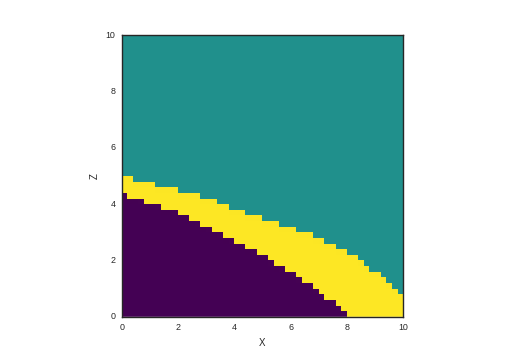

In [8]:
# GeMpy.set_interpolator(geo_data, u_grade = 0)
GeMpy.compute_block_model(geo_data, series_number= [0], verbose = 0)
GeMpy.plot_section(geo_data, 13)
#plt.imshow(geo_data.interpolator.tg.final_block.get_value().reshape(50,50,50)[:,2,:].T, origin = 'bottom')

In [8]:
geo_data.interpolator._grid_scaled.grid

array([[ 0.0001  ,  0.0001  ,  0.0001  ],
       [ 0.0001  ,  0.0001  ,  0.02411 ],
       [ 0.0001  ,  0.0001  ,  0.048119],
       ..., 
       [ 1.176571,  1.176571,  1.128551],
       [ 1.176571,  1.176571,  1.152561],
       [ 1.176571,  1.176571,  1.176571]], dtype=float32)

In [6]:
scaled = geo_data.interpolator._data_scaled

In [9]:
import theano.tensor as T
a = T.vector('polla')
a.eval?

<IPython.core.display.Javascript object>


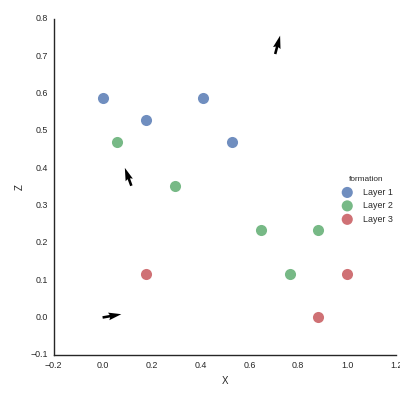

In [7]:
%matplotlib notebook
GeMpy.plot_data(scaled)

In [17]:
geo_data.interpolator.tg.final_block.get_value().reshape(50,50,50);

In [20]:
plt.imshow(geo_data.interpolator.tg.final_block.get_value().reshape(50,50,50)[:,2,:].T, origin = 'bottom')

In [4]:
import pymc as pm

inter = geo_data.interpolator._data.interfaces

Z_unc = pm.Normal('Z_unc', inter['Z'], 1./np.square(1))

@pm.deterministic
def model(value=0, Z_unc = Z_unc):
    geo_data.interpolator._data.interfaces['Z'] = pn.DataFrame(Z_unc)
    GeMpy.compute_block_model(geo_data, u_grade = 0)
   # print(geo_data.interpolator._data.interfaces)
    return geo_data.interpolator.block.get_value()

pymc_model = pm.Model([Z_unc, model])

In [5]:
M = pm.MCMC(pymc_model)

In [6]:
M.sample(4)

 [---------------------125%----------------------] 5 of 4 complete in 2.1 sec

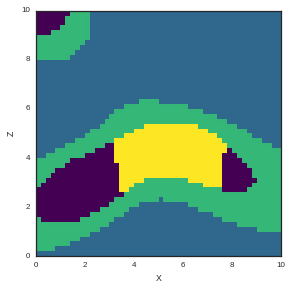

In [7]:
GeMpy.plot_section(geo_data, 13, block = M.trace('model')()[2])